# Application of PCA on Color Images

Principal Component Analysis (PCA) is a powerful technique used in data analysis to simplify the complexity of high-dimensional data while retaining its essential information. Imagine you have a dataset with many features or dimensions. PCA helps in understanding and visualizing this data by finding a new set of dimensions, called principal components, that capture the most significant variation in the original data.

![PCA Visualisation](ExplanatoryImages/PCA.gif "PCA")

(Image from: https://medium.com/@parthdholakiya180/pca-principal-component-analysis-93ae4aafa310)

### The Math behind PCA

Given a dataset $X$ with $n$ observations and $p$ variables (features), the first step in PCA is to compute the covariance matrix, given by,

$$
\Sigma = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x}) (x_i - \bar{x})^T
$$

Where $x_i$ represents the i-th observation and $\bar{x}$ is the mean vector of the dataset.


Next, we compute the eigenvectors $ \mathbf{v}_i $ and corresponding eigenvalues $ \lambda_i $ of the covariance matrix $\Sigma $

$$
\Sigma \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues indicate the magnitude of variance along each eigenvector.

The principal components are obtained by arranging the eigenvectors in decreasing order of their corresponding eigenvalues. Let $V$ be the matrix containing these eigenvectors as columns, ordered by eigenvalue magnitude. The first $k$ principal components are given by:

$$
\text{PC}_k = X \mathbf{V}_k
$$

Where $ \mathbf{V}_k $ consists of the first $k$ eigenvectors.

To reduce the dimensionality of the data, we project the original data onto the first $k$ principal components:

$$
\text{Projected Data, D} = X \mathbf{V}_k
$$

To reconstruct the original data from the projected data, we perform the inverse transformation:

$$
\text{Reconstructed Data, R} = \text{D} \mathbf{V}_k^T
$$

The proportion of variance explained by each principal component k is given by the ratio of its corresponding eigenvalue to the sum of all eigenvalues:

$$
\text{Explained Variance Ratio}_k = \frac{\lambda_k}{\sum_{i=1}^{p} \lambda_i}
$$

By selecting the first $k$ principal components that capture most of the variance in the data, we effectively reduce the dimensionality of the dataset while retaining most of its information.

PCA provides a rigorous mathematical framework for reducing the dimensionality of high-dimensional data. By identifying the directions of maximum variance and projecting the data onto these directions, PCA enables efficient data compression and visualization, making it a fundamental technique in data analysis and machine learning.

## Application of PCA on Image Compression

When we talk about image compression, we're essentially trying to reduce the amount of data required to represent an image. This reduction in data size is beneficial for tasks like storage and transmission, as smaller files are easier to manage and transfer. PCA can be a powerful tool for image compression because it helps us find the most important features in an image while discarding less important ones. In the context of images, these features can be thought of as patterns or structures that contribute the most to what we see in the image.

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import numpy as np
from ipywidgets import interact

### PCA Implementation

Although most of the work in this notebook is using the sklearn PCA library, we also try to implement PCA from scratch using our mathematical knowledge of PCA. We will also test this implementation.

In [2]:
def PCA_scratch (X, num_comp=50):

    X_meaned = X - np.mean(X , axis = 0)

    # calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # select the first n eigenvectors, n is desired dimension of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:num_comp]

    #Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

    #Reconstructing (Reverse transforming) the data
    X_recons = np.dot(eigenvector_subset,X_reduced.transpose()).transpose()

    return X_recons

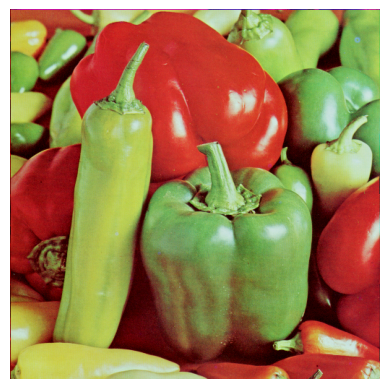

In [3]:
# Load Image
img = cv2.cvtColor(cv2.imread('peppers.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

As we can see, the image is a color (RGB) image. The primary difference between RGB and grayscale images is the number of color channels that the image has. An RGB image has three color channels: Red, Green and Blue while a grayscale image has only a single color channel.

![RGB vs Grayscale Image](ExplanatoryImages/RGB.png "RGB vs Grayscale Image")

(Image from: https://towardsdatascience.com/rgb-color-image-compression-using-principal-component-analysis-fce3f48dfdd0)

Compressing a grayscale image is straightforward since it contains only a single color channel. We represent a grayscale image as a two-dimensional (2D) NumPy array. This array serves as our 2D data matrix, onto which we apply PCA to reduce the number of columns (features). Depending on the number of components we choose to retain, we sacrifice some image quality.

Compressing an RGB image is more complex because it consists of three color channels: Red, Green, and Blue. An RGB image is represented by a three-dimensional (3D) NumPy array. Since PCA cannot directly operate on a 3D array, we need to separate the original image into its Red, Green, and Blue color channels. Each color channel is then represented by its own two-dimensional (2D) NumPy array. Subsequently, we apply PCA to each channel individually. Finally, we merge the compressed channels to reconstruct the compressed RGB image.

Let's start with decomposing the image into the respective red, green, and blue channels.

blue.shape: (512, 512)
green.shape: (512, 512)
red.shape: (512, 512)


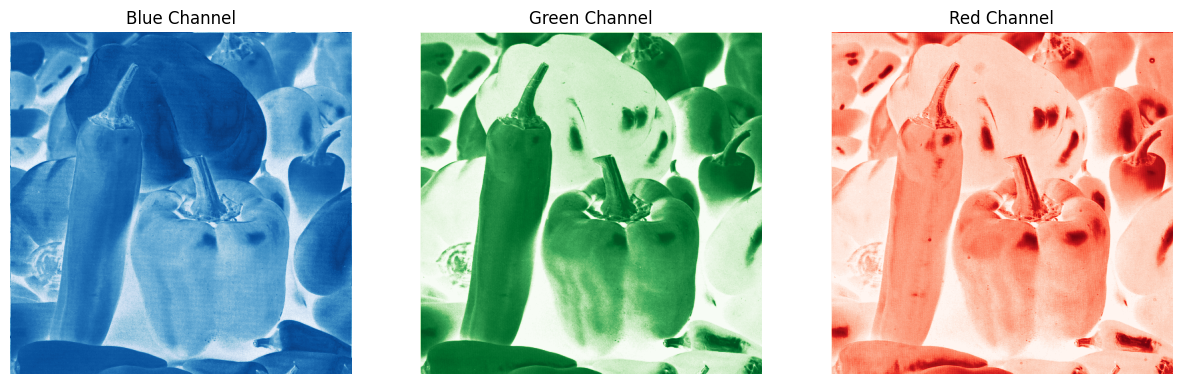

In [4]:
#Splitting into channels
blue, green, red = cv2.split(img)
print("blue.shape:", blue.shape)
print("green.shape:", green.shape)
print("red.shape:", red.shape)

# Plotting the images of the channels
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue, cmap='Blues')
plt.axis('off')
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green, cmap='Greens')
plt.axis('off')
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red, cmap='Reds')
plt.axis('off')
plt.show()

#### Feature Scaling
It is mandatory to do feature scaling before applying PCA because PCA directions are highly sensitive to the relative ranges of features. In this example, we do feature scaling by using the following simple method. This is because each image pixel value is represented by a number rangingfrom 0 to 255 (both inclusive).

In [5]:
df_blue = blue/255
df_green = green/255
df_red = red/255

Now that we have everything ready, we can start with the PCA.

![Flowchart](ExplanatoryImages/PCA_image.png "Flowchart")

(Image from: https://www.enjoyalgorithms.com/blog/image-compression-using-pca)

We start by computing the principal components. Once that is done, we project the matrix on the first $n$ components (denoted by variable num_comp). This would project the data on a lower dimensional space, hence reducing the size of the image. For viewing purposes, we reconstruct the compressed image using the first $n$ components and the projected matrix.

In [6]:
num_comp = 50

pca_b = PCA(n_components=num_comp)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=num_comp)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=num_comp)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

(512, 50)
(512, 50)
(512, 50)
Blue Channel : 0.9696890619263916
Green Channel: 0.9828892943674404
Red Channel  : 0.9705905466970648


Only using 50 components we can keep around 97% of the variance in the data.

Let's plot bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels

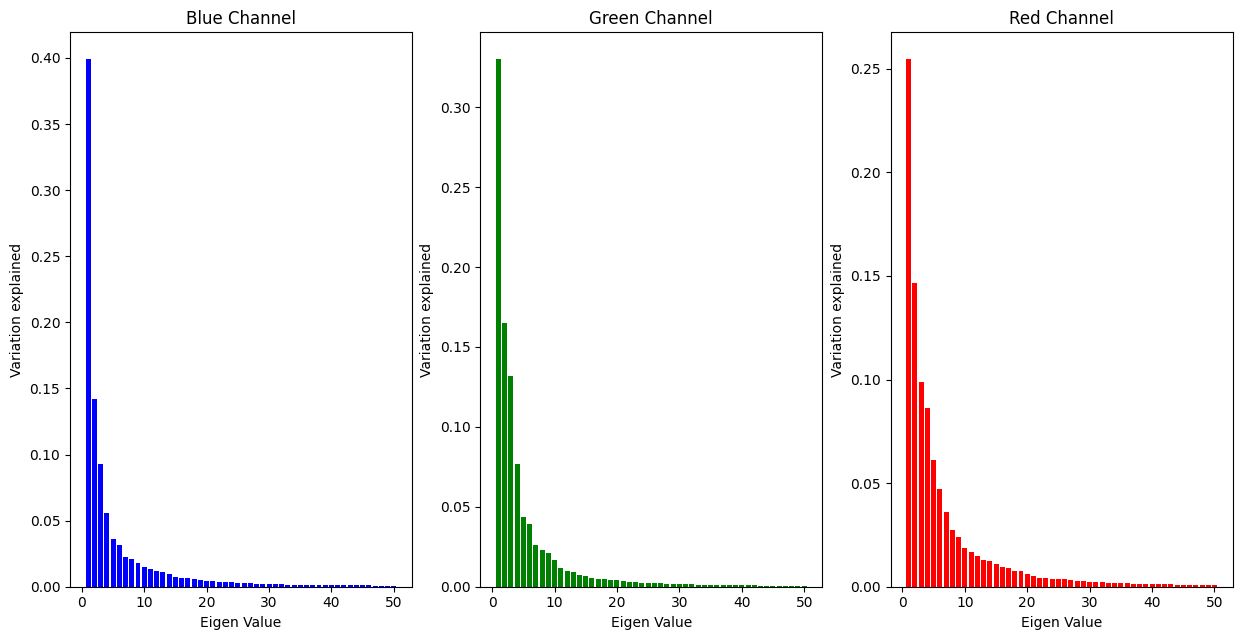

In [7]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,num_comp+1)),pca_b.explained_variance_ratio_, color='b')
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,num_comp+1)),pca_g.explained_variance_ratio_, color='g')
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,num_comp+1)),pca_r.explained_variance_ratio_, color='r')
plt.show()

We have completed our PCA dimensionality reduction. Now we will visualize the image again and for that, we have to reverse transform the data first and then merge the data of all the 3 channels into one. Then, we can will display both the Images (original and reduced) side by side.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


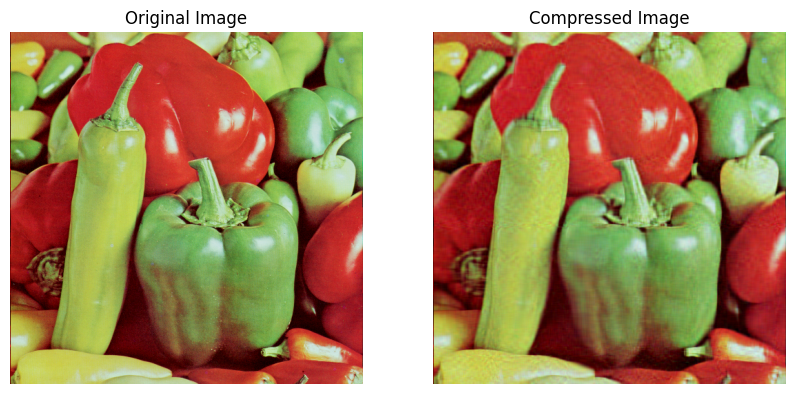

In [8]:
# Reverse Transforming the data
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

# Merging the channels
img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))

# Plotting the images
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')
fig.add_subplot(122)
plt.title("Compressed Image")
plt.imshow(img_reduced)
plt.axis('off')
plt.show()

We see that the compressed image is very similar (at least we can still identify it) to that of the original one although we have reduced the dimension individually for each channel to only 50 from 512.

#### PCA Implementation from Scratch Testing

Let us now test our PCA implementation from scratch and see how it works. However, this time, we reduce the number of components further to just 20 components. We see, that the image features are still identifiable, even though the quality has degraded due to lower number of components. Also, in our implementation from scratch, we have ignored precision error.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


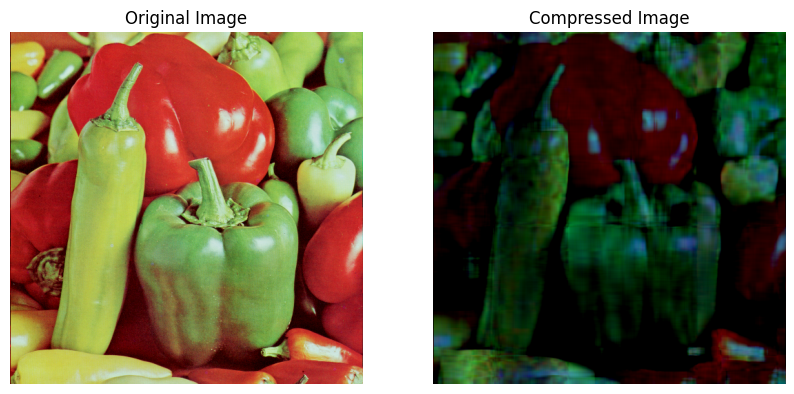

In [9]:
# Reverse Transforming the data
b_arr_scratch = PCA_scratch(df_blue, num_comp=20)
g_arr_scratch = PCA_scratch(df_green, num_comp=20)
r_arr_scratch = PCA_scratch(df_red, num_comp=20)

# Merging the channels
img_reduced_scratch = (cv2.merge((b_arr_scratch, g_arr_scratch, r_arr_scratch)))

# Plotting the images
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')
fig.add_subplot(122)
plt.title("Compressed Image")
plt.imshow(img_reduced_scratch)
plt.axis('off')
plt.show()

However, it is important to note that how the quality of the compressed image depends on the number of components we choose. To this end, we write the entire PCA process for an RGB image in a single python function and visually inspect the quality of the compressed image based on the number of components we choose. 

We can use the slider to choose the number of components and see how the image quality varies.

In [10]:
def do_pca (img, num_comp):
    blue, green, red = cv2.split(img)
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    pca_b = PCA(n_components=num_comp)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g = PCA(n_components=num_comp)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r = PCA(n_components=num_comp)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red) 
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)

    img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
    return img_reduced    

def plot_function(num_comp):
    ir = do_pca(img, num_comp)
    plt.imshow(ir)
    plt.axis('off')
    plt.show()

interact(plot_function, num_comp=(1, img.shape[0], 10))

interactive(children=(IntSlider(value=251, description='num_comp', max=512, min=1, step=10), Output()), _dom_c…

<function __main__.plot_function(num_comp)>

In conclusion, this Jupyter notebook demonstrated the application of Principal Component Analysis (PCA) on color images for image compression. For RGB images, the process was more intricate. We first split the image into its Red, Green, and Blue color channels, each represented as a 2D array. PCA was then applied independently to each channel, reducing their dimensionality. Finally, the compressed channels were merged to reconstruct the compressed RGB image.

Through these demonstrations, we can see how PCA can effectively reduce the dimensionality of image data, leading to compression while retaining significant image information. PCA serves as a valuable tool for image processing tasks, offering efficient data representation and storage.